<a href="https://colab.research.google.com/github/michaelengh/github-slideshow/blob/main/08___Project1Part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np

Mounted at /content/drive


In [2]:
salesfile = '/content/drive/MyDrive/**Coding Dojo**/02 Week 2: Pandas/Files for Lessons/sales_predictions.csv'

df = pd.read_csv(salesfile)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


item 1

In [3]:
df.shape

(8523, 12)

item 2

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


item 3

In [5]:
df.duplicated().sum()

0

item 4

In [6]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

item 5

In [7]:
null_vals = df.isna().sum()
nullx = null_vals[null_vals>0].index
nullx

Index(['Item_Weight', 'Outlet_Size'], dtype='object')

In [8]:
df = df.fillna(df.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [ ]:
# replaced the null values in item weight with the mean value. will now skew low/high values and for overall mean value wont change drastically

In [9]:

df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
df.fillna('Missing', inplace=True)

In [11]:
# only one column left with missing data that are characters so i filled with Missing

item 6

In [12]:
 df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [13]:
data_types = df.dtypes
data_types

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

item 7

In [14]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

item 7

In [15]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF','Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat','Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg','Regular')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

item 8

In [16]:
print('Min Item Weight:',df['Item_Weight'].min())
print('Min Item Visibility:',df['Item_Visibility'].min())
print('Min Item MRP:',df['Item_MRP'].min())
print('Min Est Year:',df['Outlet_Establishment_Year'].min())
print('Min Item Outlet Sales:',df['Item_Outlet_Sales'].min())
print('Avg Item Weight:',df['Item_Weight'].mean())
print('Avg Item Visibility:',df['Item_Visibility'].mean())
print('Avg Item MRP:',df['Item_MRP'].mean())
print('Avg Item Est Year:',df['Outlet_Establishment_Year'].mean())
print('Avg Item Outlet Sales:',df['Item_Outlet_Sales'].mean())
print('Max Item Weight:',df['Item_Weight'].max())
print('Max Item Visibility:',df['Item_Visibility'].max())
print('Max Item MRP:',df['Item_MRP'].max())
print('Max Item Est Year:',df['Outlet_Establishment_Year'].max())
print('Max Item Outlet Sales:',df['Item_Outlet_Sales'].max())

Min Item Weight: 4.555
Min Item Visibility: 0.0
Min Item MRP: 31.29
Min Est Year: 1985
Min Item Outlet Sales: 33.29
Avg Item Weight: 12.857645184136409
Avg Item Visibility: 0.06613202877895127
Avg Item MRP: 140.9927819781768
Avg Item Est Year: 1997.8318667135984
Avg Item Outlet Sales: 2181.2889135750365
Max Item Weight: 21.35
Max Item Visibility: 0.328390948
Max Item MRP: 266.8884
Max Item Est Year: 2009
Max Item Outlet Sales: 13086.9648


Project 1 - Part 3 (Core)

step1



In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

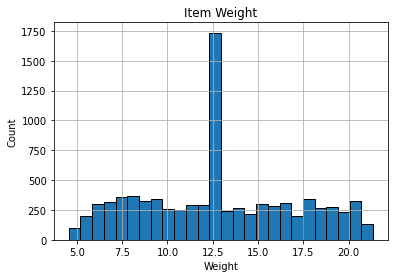

In [18]:
df['Item_Weight'].hist(bins = 'auto',edgecolor='black')
plt.title('Item Weight')
plt.ylabel('Count')
plt.xlabel('Weight');

with this histogram I can see that most items weigh in the 12-13 range

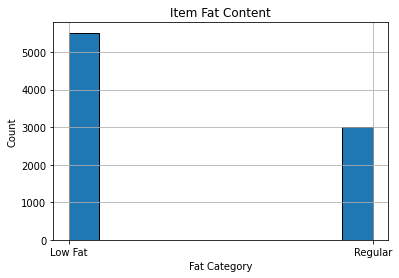

In [19]:
df['Item_Fat_Content'].hist(edgecolor='black')
plt.title('Item Fat Content')
plt.ylabel('Count')
plt.xlabel('Fat Category');

From this i can see that majority of the items are Low Fat

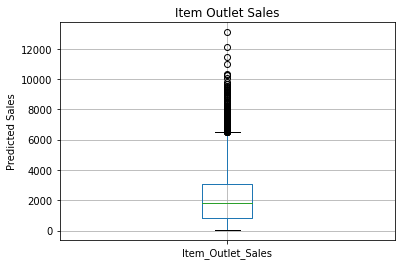

In [20]:
#Item_Outlet_Sales
df.boxplot(column = 'Item_Outlet_Sales',);
plt.title('Item Outlet Sales');
plt.ylabel('Predicted Sales');

With a boxplot on the Item sales column, I am able to see that there are a few outliers that range between 6500 and 12500 that may scew any averages that i may want to retrieve

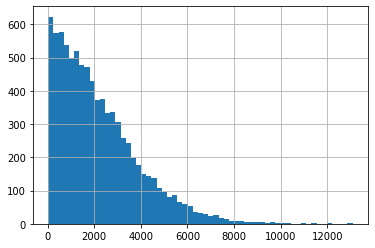

In [21]:
df['Item_Outlet_Sales'].hist(bins='auto')

In [23]:
corr = df.corr()

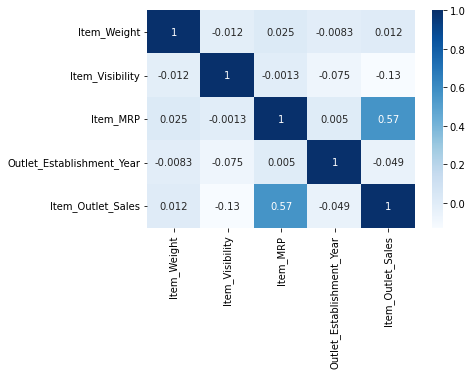

In [24]:
sns.heatmap(corr, cmap = 'Blues', annot=True);

In [25]:
data_types = df.dtypes
obj_cols = data_types[data_types=="object"]
obj_cols = obj_cols.index

for col in obj_cols:
  print(f"{col}:")
  print(df[col].value_counts(dropna=False))
  print("\n\n")

Item_Identifier:
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64



Item_Fat_Content:
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64



Item_Type:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64



Outlet_Identifier:
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, 

the below hist i can see that majority of inventory is from outlet type "Supermarket Type 1"

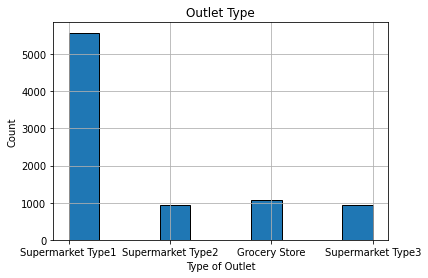

In [26]:
df['Outlet_Type'].hist(edgecolor='black')
plt.title('Outlet Type')
plt.ylabel('Count')
plt.xlabel('Type of Outlet');

below we can compare that even though Supermarket type 1(which has the most sales) have roughly the same ratio of items sold between the categories of Low fat and Regular. 

In [27]:
sm_typeone = df['Outlet_Type'] == 'Supermarket Type1'

In [28]:
sm_one_df = df.loc[sm_typeone, :]

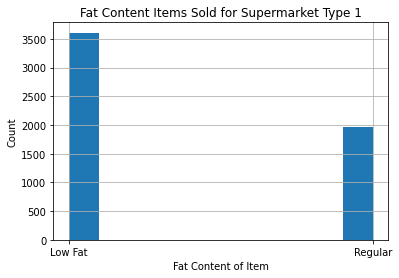

In [29]:
sm_one_df['Item_Fat_Content'].hist()
plt.title('Fat Content Items Sold for Supermarket Type 1')
plt.ylabel('Count')
plt.xlabel('Fat Content of Item');

In [30]:
other_df = df.loc[~sm_typeone, :]

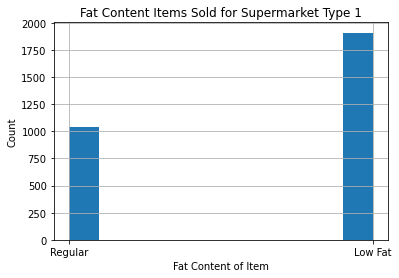

In [31]:
other_df['Item_Fat_Content'].hist()
plt.title('Fat Content Items Sold for Supermarket Type 1')
plt.ylabel('Count')
plt.xlabel('Fat Content of Item');

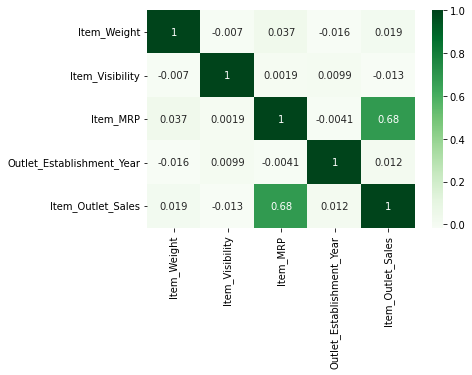

In [32]:
corr_two = sm_one_df.corr()
sns.heatmap(corr_two, cmap = 'Greens', annot=True);

the below plot of weights for the given store type is showing a mean of 12.5. all items are within normal ranges with no ouliers reported.

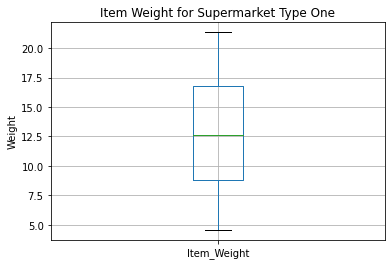

In [33]:
sm_one_df.boxplot(column = 'Item_Weight',);
plt.title('Item Weight for Supermarket Type One');
plt.ylabel('Weight');